# Black Friday Prediction


## 1. Import


### 1.1 Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [2]:
import matplotlib.style as style
style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

### 1.2 Import data


In [3]:
df = pd.read_csv('train.csv')
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df = df.rename(columns={"Stay_In_Current_City_Years":"Years_in_city"})
df.head(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227


##  2. Preprocessing & Visualization



In [5]:
duplicated = df[df.duplicated()]
print("number of duplicated:", duplicated.shape[0])

number of duplicated: 0


In [6]:
user_df = df[["User_ID", "Gender", "Age", "Occupation", "City_Category", "Years_in_city", "Marital_Status"]]
user_duplicated = user_df[user_df.duplicated()]
print("number of duplicated user:", user_duplicated.shape[0])
user_df = user_df.drop_duplicates()
print("number of duplicated user:", user_df[user_df.duplicated()].shape[0])

number of duplicated user: 544177
number of duplicated user: 0


In [7]:
purchased = df[["User_ID", "Purchase"]]
purchased = purchased.groupby("User_ID", as_index = False).agg({'Purchase': 'sum'})
user_df = pd.merge(user_df, purchased, on='User_ID')
print('Total amount of money spent by each user:')
print(purchased.head())

Total amount of money spent by each user:
   User_ID  Purchase
0  1000001    334093
1  1000002    810472
2  1000003    341635
3  1000004    206468
4  1000005    821001


In [8]:
user_df = user_df.rename(columns={'Purchase': 'Total_Purchase'})
user_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Total_Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001


### Relationship between Gender - Purchase amount  

In [9]:
print("number of female users:", len(user_df[user_df.Gender == "M"]))
print("number of male users:", len(user_df[user_df.Gender == "F"]))

number of female users: 4225
number of male users: 1666


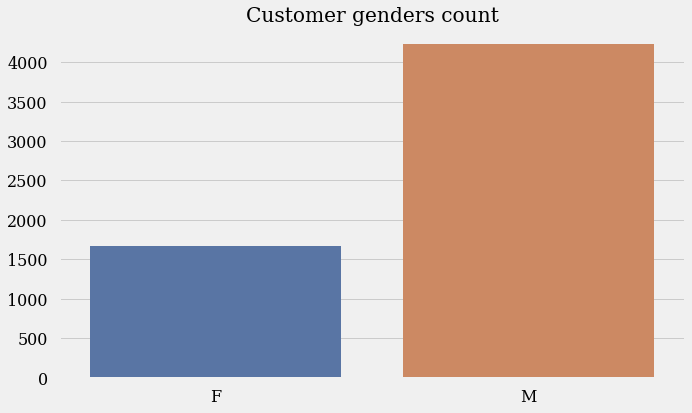

In [10]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Gender", data= user_df, palette="deep")
plt.ylabel("")
ax.set(xlabel = None, title = "Customer genders count")
plt.show()

In [11]:
gender_purchased = user_df[["Gender", "Total_Purchase"]]
gender_purchased = gender_purchased.groupby("Gender", as_index = False).agg({'Total_Purchase': 'sum'})
gender_purchased.head()

,Gender,Total_Purchase
0,F,1186232642
1,M,3909580100


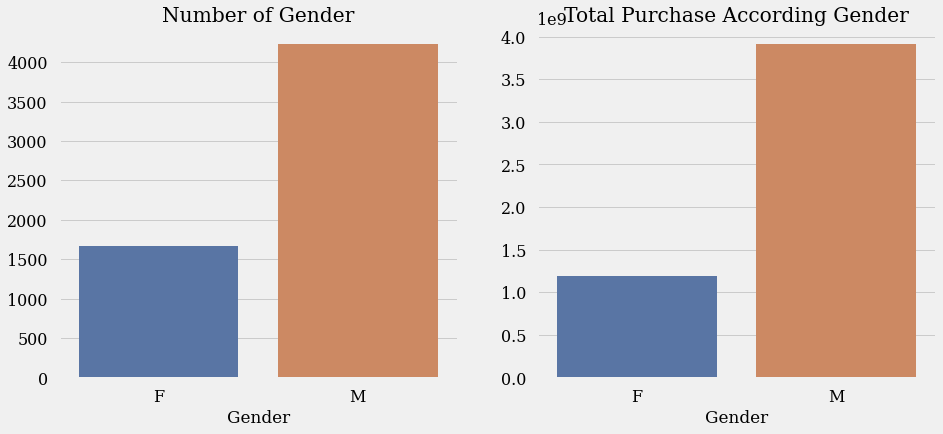

In [12]:
fig, ax = plt.subplots(1,2, figsize = (14,6))
sns.countplot(ax = ax[0], x= 'Gender', data= user_df, palette="deep")
sns.barplot(ax= ax[1], x = "Gender", y="Total_Purchase", data= gender_purchased, ci=None, palette="deep")
ax[0].set(title="Number of Gender", ylabel = None)
ax[1].set(title="Total Purchase According Gender", ylabel = None)
plt.show()

### Relationship between City Category - Purchase amount 

In [13]:
city_purchase = user_df[["City_Category", "Total_Purchase"]]
city_purchase = city_purchase.groupby("City_Category", as_index = False).agg({'Total_Purchase': 'sum'})
print(city_purchase)

  City_Category  Total_Purchase
0             A      1316471661
1             B      2115533605
2             C      1663807476


In [14]:
city_purchase["Number Citizen"] = 0
for city in user_df.City_Category.unique():
    city_purchase.loc[city_purchase.City_Category == city, "Number Citizen"] = len(user_df[user_df.City_Category == city])
city_purchase["Ratio Purchase/Person"] = round(city_purchase.Total_Purchase / city_purchase["Number Citizen"], 3)
print(city_purchase)

  City_Category  Total_Purchase  Number Citizen  Ratio Purchase/Person
0             A      1316471661            1045            1259781.494
1             B      2115533605            1707            1239328.415
2             C      1663807476            3139             530043.796


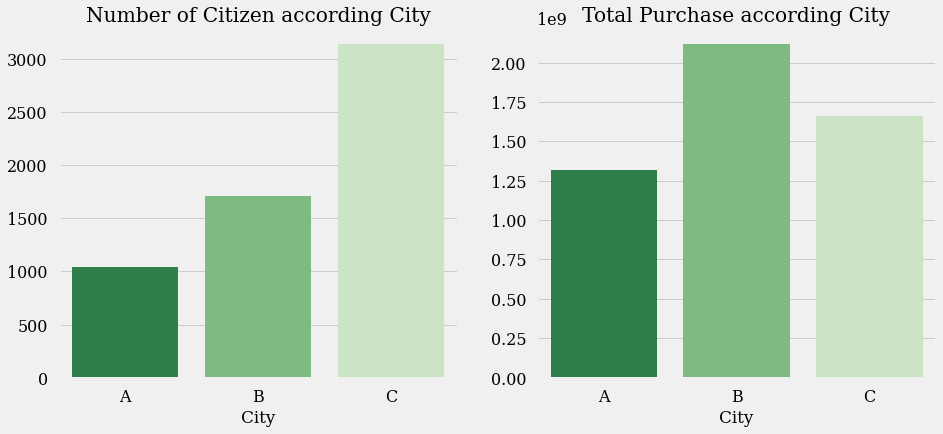

In [15]:
fig, ax = plt.subplots(1,2, figsize = (14,6))
sns.countplot(ax = ax[0], x= 'City_Category', data= user_df, order=["A", "B", "C"], palette='Greens_r')
sns.barplot(ax= ax[1], x = "City_Category", y="Total_Purchase", data= city_purchase, ci=None, palette='Greens_r')
ax[0].set(title="Number of Citizen according City", ylabel = None, xlabel="City")
ax[1].set(title="Total Purchase according City", ylabel = None, xlabel="City")

plt.show()

### Relationship between Age - Purchase amount 

In [16]:
age_purchase = user_df[["Age", "Total_Purchase"]]
age_purchase = age_purchase.groupby("Age", as_index = False).agg({'Total_Purchase': 'sum'})
age_purchase

,Age,Total_Purchase
0,0-17,134913183
1,18-25,913848675
2,26-35,2031770578
3,36-45,1026569884
4,46-50,420843403
5,51-55,367099644
6,55+,200767375


In [17]:
age_purchase["Number customer"] = 0
for age in age_purchase.Age.unique():
    age_purchase.loc[age_purchase.Age == age, "Number customer"] = len(user_df[user_df.Age == age])
age_purchase["Ratio Purchase/Person"] = round(age_purchase.Total_Purchase / age_purchase["Number customer"], 3)
age_purchase

,Age,Total_Purchase,Number customer,Ratio Purchase/Person
0,0-17,134913183,218,618867.812
1,18-25,913848675,1069,854863.120
2,26-35,2031770578,2053,989659.317
3,36-45,1026569884,1167,879665.710
4,46-50,420843403,531,792548.782
5,51-55,367099644,481,763200.923
6,55+,200767375,372,539697.245


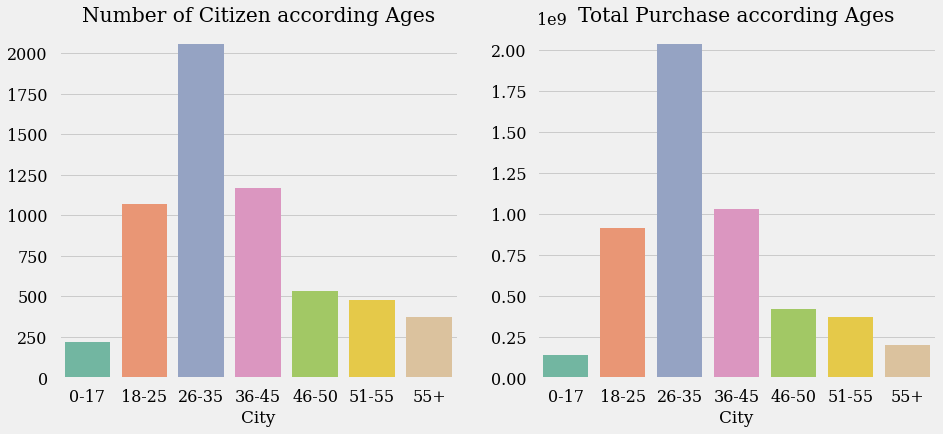

In [18]:
age_order = list(age_purchase.Age.unique())

fig, ax = plt.subplots(1,2, figsize = (14,6))
sns.countplot(ax = ax[0], x= 'Age', data= user_df, order = age_order, palette='Set2')
sns.barplot(ax= ax[1], x = "Age", y="Total_Purchase", data= age_purchase, ci=None, palette='Set2')
ax[0].set(title="Number of Citizen according Ages", ylabel = None, xlabel="City")
ax[1].set(title="Total Purchase according Ages", ylabel = None, xlabel="City")

plt.show()

In [19]:
# sns.barplot(x = "Age", y = "Ratio Purchase/Person", data= age_purchase)
# plt.title("Amount of money spent by each person on average according their Age.")
# plt.ylabel(None)

# plt.show()
print(list(age_purchase.sort_values(by="Ratio Purchase/Person", ignore_index=True).Age))

['55+', '0-17', '51-55', '46-50', '18-25', '36-45', '26-35']


### Relationship between Occupation - Purchase amount


In [20]:
job_purchase = user_df[['Occupation', 'Total_Purchase']]
job_purchase = job_purchase.groupby(by='Occupation', as_index = False).agg({'Total_Purchase': 'sum'})
job_purchase.head(6)

,Occupation,Total_Purchase
0,0,635406958
1,1,424614144
2,2,238028583
3,3,162002168
4,4,666244484
5,5,113649759


In [21]:
job_purchase['NumberCustomer'] = 0 
for job in job_purchase.Occupation.unique():
    job_purchase.loc[job_purchase.Occupation == job, 'NumberCustomer'] = len(user_df[user_df.Occupation == job])
job_purchase['Ratio Purchase/Person'] = round(job_purchase.Total_Purchase / job_purchase["NumberCustomer"], 3)
job_purchase.head(6)

,Occupation,Total_Purchase,NumberCustomer,Ratio Purchase/Person
0,0,635406958,688,923556.625
1,1,424614144,517,821303.954
2,2,238028583,256,929799.152
3,3,162002168,170,952953.929
4,4,666244484,740,900330.384
5,5,113649759,111,1023871.703


In [22]:
print(job_purchase.sort_values(by='Ratio Purchase/Person',ignore_index=True))
# job_purchase.Occupation = job_purchase.Occupation - 1
job_purchase
print("\nOrder of Job ID which spent most money:")
print(list(job_purchase.sort_values(by='Ratio Purchase/Person').Occupation))

    Occupation  Total_Purchase  NumberCustomer  Ratio Purchase/Person
0           13        71919481             140             513710.579
1           10       115844465             192             603356.589
2            9        54340046              88             617500.523
3           17       393281453             491             800980.556
4           12       305449446             376             812365.548
5            1       424614144             517             821303.954
6            6       188416784             228             826389.404
7            7       557371587             669             833141.386
8           11       106751618             128             833997.016
9           15       118960211             140             849715.793
10           8        14737388              17             866905.176
11          14       259454692             294             882498.952
12           4       666244484             740             900330.384
13          18      

### Relationship between Gender - Martial Status - Purchase amount  

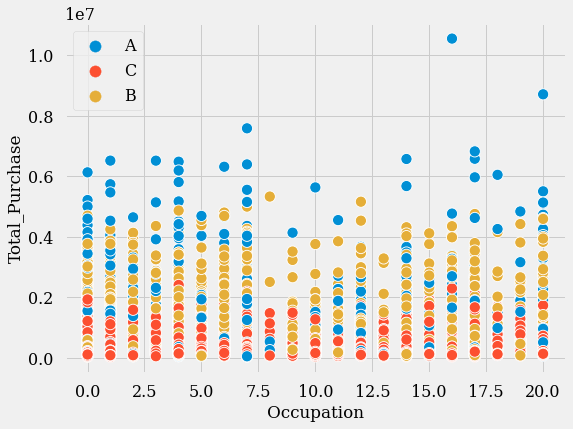

In [23]:
plt.figure(figsize=(8,6))
kws = dict(s=200, linewidth=1, edgecolor='w', alpha=0.75)
sns.scatterplot(data=user_df, y='Total_Purchase',x = "Occupation", hue= 'City_Category')
plt.legend()

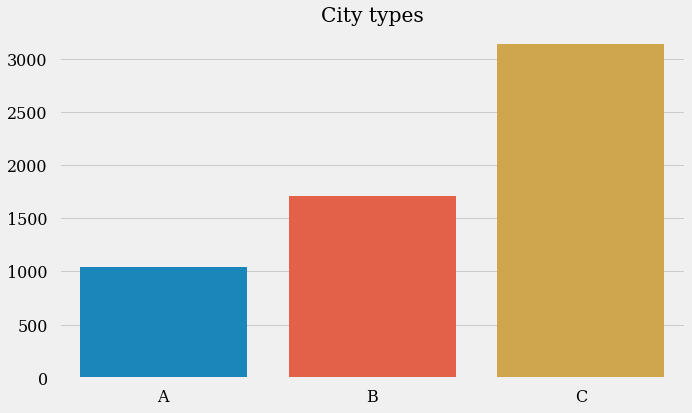

In [24]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="City_Category", data= user_df, order=["A", "B", "C"])
plt.ylabel("")
ax.set(xlabel = None, title = "City types")
plt.show()

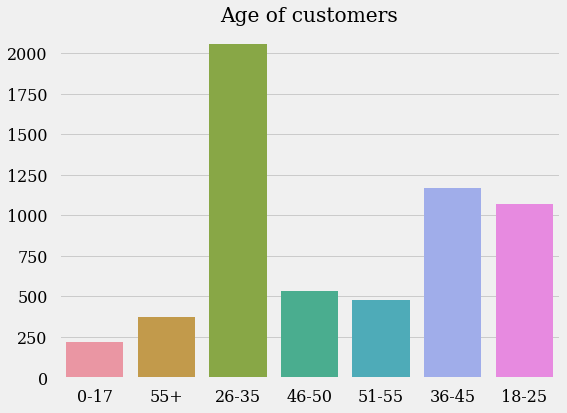

In [25]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Age", data= user_df)
plt.ylabel("")
ax.set(xlabel = None, title = "Age of customers")
plt.show()

**VISUALIZATION**

In [26]:
user_df.head()

,User_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Total_Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001


## Modelling

### Process 

In [27]:
learn_df = df.copy()
learn_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [28]:
learn_df['Efficiency'] = 3 - learn_df.iloc[:,[8, 9, 10]].isnull().sum(axis = 1)
learn_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Efficiency
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,3
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,1


In [29]:
learn_df.Product_Category_1.count

<bound method Series.count of 0          3
1          1
2         12
3         12
4          8
          ..
550063    20
550064    20
550065    20
550066    20
550067    20
Name: Product_Category_1, Length: 550068, dtype: int64>

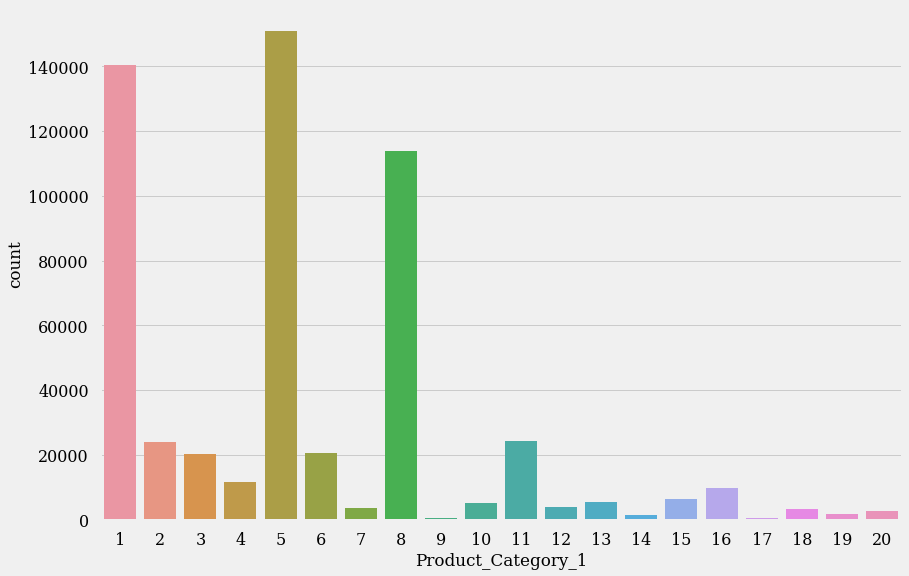

In [30]:
sns.countplot(x= 'Product_Category_1', data= learn_df)

In [31]:
# dic1 = []
# for i in user_df.Product_Category_1.unique():
#     dic1.append([i,len(user_df[user_df.Product_Category_1 == i])])
# for key, value in sorted(dic1, key= lambda x: x[1], reverse=True):
#     print(key , ' - ' , value)

In [32]:
# sns.countplot(x = 'Product_Category_2', data= user_df)

In [33]:
# sns.countplot(x='Product_Category_3', data=user_df)

In [34]:
def preprocessing_train(data_frame:pd.DataFrame):
    df = data_frame.copy()
    df['Efficiency'] = 3 - df.iloc[:,[8, 9, 10]].isnull().sum(axis = 1)
    df.Product_Category_1 = df.Product_Category_1.fillna(0)
    df.Product_Category_2 = df.Product_Category_2.fillna(0)
    df.Product_Category_3 = df.Product_Category_3.fillna(0)
    
    le = LabelEncoder()
    ss = StandardScaler()

    df.Gender = le.fit_transform(df.Gender)
    df.City_Category = le.fit(['C', 'B', 'A']).transform(df.City_Category)
    df.Age = le.fit(['55+', '0-17', '51-55', '46-50', '18-25', '36-45', '26-35']).transform(df.Age)
    df.Years_in_city = le.fit(['0', '1', '2', '3', '4+']).transform(df.Years_in_city)
    df.Occupation = le.fit([13, 10, 9, 17, 12, 1, 6, 7, 11, 15, 8, 14, 4, 18, 0, 2, 3, 16, 5, 19, 20]).transform(df.Occupation)
#     X = df.iloc[:, [2,3,4,5,6,7,12]]
    X = df.iloc[:, [2,3,4,5,6,7]]

    y = df.iloc[:, 11]
    return X, y
def preprocessing_test(data_frame:pd.DataFrame):
    df = data_frame.copy()
    df['Efficiency'] = 3 - df.iloc[:,[8, 9, 10]].isnull().sum(axis = 1)
    df.Product_Category_1 = df.Product_Category_1.fillna(0)
    df.Product_Category_2 = df.Product_Category_2.fillna(0)
    df.Product_Category_3 = df.Product_Category_3.fillna(0)
    
    le = LabelEncoder()
    ss = StandardScaler()

    df.Gender = le.fit_transform(df.Gender)
    df.City_Category = le.fit(['C', 'B', 'A']).transform(df.City_Category)
    df.Age = le.fit(['55+', '0-17', '51-55', '46-50', '18-25', '36-45', '26-35']).transform(df.Age)
    df.Years_in_city = le.fit(['0', '1', '2', '3', '4+']).transform(df.Years_in_city)
    df.Occupation = le.fit([13, 10, 9, 17, 12, 1, 6, 7, 11, 15, 8, 14, 4, 18, 0, 2, 3, 16, 5, 19, 20]).transform(df.Occupation)
#     X = df.iloc[:, [2,3,4,5,6,7,11]]
    X = df.iloc[:, [2,3,4,5,6,7]]
#     y = df.iloc[:, 11]
    return X    

In [35]:
def preprocessing_test(data_frame:pd.DataFrame):
    df = data_frame.copy()
    df['Efficiency'] = 3 - df.iloc[:,[8, 9, 10]].isnull().sum(axis = 1)
    df.Product_Category_1 = df.Product_Category_1.fillna(0)
    df.Product_Category_2 = df.Product_Category_2.fillna(0)
    df.Product_Category_3 = df.Product_Category_3.fillna(0)
    
    le = LabelEncoder()
    ss = StandardScaler()

    df.Gender = le.fit_transform(df.Gender)
    df.City_Category = le.fit(['C', 'B', 'A']).transform(df.City_Category)
    df.Age = le.fit(['55+', '0-17', '51-55', '46-50', '18-25', '36-45', '26-35']).transform(df.Age)
    df.Years_in_city = le.fit(['0', '1', '2', '3', '4+']).transform(df.Years_in_city)
    df.Occupation = le.fit([13, 10, 9, 17, 12, 1, 6, 7, 11, 15, 8, 14, 4, 18, 0, 2, 3, 16, 5, 19, 20]).transform(df.Occupation)
#     X = df.iloc[:, [2,3,4,5,6,7,11]]
    X = df.iloc[:, [2,3,4,5,6,7]]
#     y = df.iloc[:, 11]
    return X

**Modelling**

In [36]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score
import math

In [37]:
le = LabelEncoder()
ss = StandardScaler()

In [38]:
learn_df = df.copy()
X, y = preprocessing_train(learn_df)
X.head(), y.head()

(   Gender  Age  Occupation  City_Category  Years_in_city  Marital_Status
 0       0    0          10              0              2               0
 1       0    0          10              0              2               0
 2       0    0          10              0              2               0
 3       0    0          10              0              2               0
 4       1    6          16              2              4               0,
 0     8370
 1    15200
 2     1422
 3     1057
 4     7969
 Name: Purchase, dtype: int64)

In [40]:
learn_df.head(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Years_in_city,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227


Age order: ['55+', '0-17', '51-55', '46-50', '18-25', '36-45', '26-35']

In [ ]:
# df_copy = df.copy()
# age_label = le.fit(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
# df_copy.Age = age_label.transform(df_copy.Age)

In [ ]:
# df_copy.Gender = le.fit_transform(df_copy.Gender)
# city_label = le.fit(['C', 'B', 'A'])
# df_copy.City_Category = city_label.transform(df_copy.City_Category)
# year_label = le.fit(['0', '1', '2', '3', '4+'])
# df_copy.Years_in_city = year_label.transform(df_copy.Years_in_city)

In [ ]:
# df_copy.head()

In [ ]:
# df_copy.info()

In [ ]:
# df_copy = df_copy.sort_values(by=['Product_Category_1', 'Product_Category_2', 'Product_Category_3'], ascending=[False, False, False])
# display(df_copy.head(4))

In [ ]:
# df_copy.Product_ID = le.fit_transform(df_copy.Product_ID)
# df_copy.head(4)

In [ ]:
# num_product = df.Product_ID.unique()
# print("number of products:", len(num_product))

In [ ]:
# print("maximum items that was bought by 1 user:", max(a2), 
#       "\nminimum items that was bought by 1 user:", min(a2))

## Simple linear regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# test: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Imoprt test.csv
test_df = pd.read_csv('test.csv')
test_df = test_df.rename(columns={"Stay_In_Current_City_Years":"Years_in_city"})
test_df.info()

In [ ]:
X, y = preprocessing_train(learn_df)
X_test = preprocessing_test(test_df)

In [ ]:
#test 
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
#test
print(math.sqrt(mean_squared_error(y_pred, y)))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.iloc[:,:-1], df_copy.iloc[:,-1], test_size=0.25, random_state=3)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(math.sqrt(mean_squared_error(y_pred, y_test)))

In [ ]:
#test
X_test = preprocessing_test(test_df)
y_test_pred = model.predict(X_test)
y_test_pred

In [ ]:
submit_df = pd.DataFrame()
submit_df["Purchase"] = y_test_pred
submit_df["User_ID"] = test_df.loc[:, "User_ID"]
submit_df['Product_ID'] = test_df.loc[:, "Product_ID"]
submit_df.to_csv(path_or_buf= 'out.csv', index = False)

## Polynomial Regression


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

In [ ]:
trans_ = LinearRegression().fit(poly_X_train, y_train)
y_pred = trans_.predict(poly.fit_transform(X_test))
print(math.sqrt(mean_squared_error(y_pred, y_test)))

In [ ]:
poly_X = poly.fit_transform(X_test)

In [ ]:
y_pred = trans_.predict(poly_X)
y_pred

In [ ]:
# Output, need change name
submit_df = pd.DataFrame()
submit_df["Purchase"] = y_pred
submit_df["User_ID"] = test_df.loc[:, "User_ID"]
submit_df['Product_ID'] = test_df.loc[:, "Product_ID"]
submit_df.to_csv(path_or_buf= 'out2.csv', index = False)

### Analysis on Test Data 

In [ ]:
train_df = user_df.copy()

In [ ]:
test_df.head()

In [ ]:
top_user = list(train_df.sort_values(by="Total_Purchase", ignore_index=False, ascending=True).User_ID.unique())
print(top_user)

In [ ]:
user_df.head()

In [ ]:
len(user_df.User_ID.unique()) - len(test_df.User_ID.unique())

In [ ]:
# test preprocess for analysis 
def preprocessing_train(data_frame:pd.DataFrame):
    df = data_frame.copy()
    df['Efficiency'] = 3 - df.iloc[:,[8, 9, 10]].isnull().sum(axis = 1)
    df.Product_Category_1 = df.Product_Category_1.fillna(0)
    df.Product_Category_2 = df.Product_Category_2.fillna(0)
    df.Product_Category_3 = df.Product_Category_3.fillna(0)
    
    le = LabelEncoder()
    ss = StandardScaler()

    df.Gender = le.fit_transform(df.Gender)
    df.City_Category = le.fit(['C', 'B', 'A']).transform(df.City_Category)
    df.Age = le.fit(['55+', '0-17', '51-55', '46-50', '18-25', '36-45', '26-35']).transform(df.Age)
    df.Years_in_city = le.fit(['0', '1', '2', '3', '4+']).transform(df.Years_in_city)
    df.Occupation = le.fit([13, 10, 9, 17, 12, 1, 6, 7, 11, 15, 8, 14, 4, 18, 0, 2, 3, 16, 5, 19, 20]).transform(df.Occupation)
    df.User_ID = le.fit(top_user).transform(df.User_ID)
    #     X = df.iloc[:, [2,3,4,5,6,7,12]]
    X = df.iloc[:, [0, 2,3,4,5,6,7,8,9,10, 12]]

    y = df.iloc[:, 11]
    return X, y
def preprocessing_test(data_frame:pd.DataFrame):
    df = data_frame.copy()
    df['Efficiency'] = 3 - df.iloc[:,[8, 9, 10]].isnull().sum(axis = 1)
    df.Product_Category_1 = df.Product_Category_1.fillna(0)
    df.Product_Category_2 = df.Product_Category_2.fillna(0)
    df.Product_Category_3 = df.Product_Category_3.fillna(0)
    
    le = LabelEncoder()
    ss = StandardScaler()
    
    df.User_ID = le.fit(top_user).transform(df.User_ID)
    df.Gender = le.fit_transform(df.Gender)
    df.City_Category = le.fit(['C', 'B', 'A']).transform(df.City_Category)
    df.Age = le.fit(['55+', '0-17', '51-55', '46-50', '18-25', '36-45', '26-35']).transform(df.Age)
    df.Years_in_city = le.fit(['0', '1', '2', '3', '4+']).transform(df.Years_in_city)
    df.Occupation = le.fit([13, 10, 9, 17, 12, 1, 6, 7, 11, 15, 8, 14, 4, 18, 0, 2, 3, 16, 5, 19, 20]).transform(df.Occupation)
#     X = df.iloc[:, [2,3,4,5,6,7,11]]
    X = df.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8,9,10,11]]
#     y = df.iloc[:, 11]
    return X

In [ ]:
X, y = preprocessing_train(learn_df)
testX = preprocessing_test(test_df)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=43)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(math.sqrt(mean_squared_error(y_pred, y_test)))

In [ ]:
submit_y = model.predict(testX)

In [ ]:
submit_df = pd.DataFrame()
submit_df["Purchase"] = submit_y
submit_df["User_ID"] = test_df.loc[:, "User_ID"]
submit_df['Product_ID'] = test_df.loc[:, "Product_ID"]
submit_df.to_csv(path_or_buf= 'out.csv', index = False)

In [ ]:
df.head()

#### Product analysis


In [ ]:
product_df = df.iloc[:, [0, 1, 8, 9, 10, 11]]
product_df.head()

In [ ]:
product_df.info()

In [ ]:
train_product = product_df.iloc[:, 0]
u_train_product = train_product.unique()
print("number of distinct products in train data:", len(u_train_product))
print("number of duplicated products in train data:", product_df[product_df.duplicated()].shape[0])

In [ ]:
test_product = test_df.iloc[:, 1]
u_test_product = test_product.unique()
print("number of distinct products in test data:", len(u_test_product))
print("number of duplicated product in test data:", test_product[test_product.duplicated()].shape[0])

In [ ]:
# res = u_train_product[~u_train_product.isin(u_test_product)]
# len(res)
in_train_but_test = np.isin(u_train_product,u_test_product, invert=True)
print("number of products in train data but not in test data:", len(u_train_product[in_train_but_test]))
in_test_but_train = np.isin(u_test_product, u_train_product, invert=True)
print("number of products in test data but not in train data:", len(u_test_product[in_test_but_train]))

In [ ]:
print(sorted(u_test_product[in_test_but_train])[0:2])
print("product P00012642 in train data:")
(product_df[product_df.Product_ID == 'P00012642'])

In [ ]:
new_products = test_df.loc[test_df.Product_ID.isin(list(u_test_product[in_test_but_train]))]
new_products.head()

In [ ]:
# a = product_df[(product_df.Product_Category_1 == 5) & (product_df.Product_Category_2 == 8) & (product_df.Product_Category_3 == 18)]
# print(len(a))
# a.drop_duplicates()
# print(len(a))

In [ ]:
print(sorted(test_df.Product_Category_1.unique()))
print(sorted(test_df.Product_Category_2.unique()))
print(sorted(test_df.Product_Category_3.unique()))


In [ ]:
len(product_df.Product_ID.unique())

In [ ]:
product_df.head(), product_df.info()

In [ ]:
test = product_df.copy()
test = test.groupby(by= "Product_ID", as_index= False).agg(({'Purchase': 'sum'}))
test.head(), test.info()